## Assignment 1

**Submission deadlines:** 
- get at least **2** points by Tuesday, 15.03.2022
- remaining points: last lab session before or on Tuesday, 22.03.2022

**Points:** Aim to get 8 out of 12 possible points

## Submission instructions
The class is held on-site in lab rooms. Please prepare you notebook on your computer or anywhere in the cloud (try using DeepNote or Google Colab).
Make sure you know all the questions and asnwers, and that the notebook contains results; bfore presentation do `Runtime -> Restart and run all`
![Picture title](image-20220302-183151.png)

We provide starter code, however you are not required to use it as long as you properly solve the tasks.


# Task description

## TLDR
Implement and train a neural network using pure numpy.


## Problem 1 [2p]
Implement a two-layer network, manually set weights and biases to solve the XOR task.

A two-layer neural network implementes a function $f: \mathbb{R}^D \rightarrow \mathbb{R}^O$ where $D$ is the input dimensionality and $O$ is the output dinemsionality. The output goes through an intermediate representation (the hidden layer) with dimensionality $H$. 

The computations are as follows:
$$
\begin{aligned}
A_1 &= x W_1^T + b_1  & \qquad\text{Total input to neurons in the hidden layer (network's first layer)} \\
O_1 &= \sigma_1(A_1)  & \qquad\text{Output of the hidden layer} \\
A_2 &= O_1 W_2^T + b_2 & \qquad\text{Total input to neurons in the output layer (network's second layer)}\\
O_2 &= \sigma_2(A_2)  & \qquad\text{Output of the network}
\end{aligned}
$$

Where $W$ are weight matrices, $b$ are bias vectors, $\sigma$ are non-linear activation functions (e.g. the logistic sigmoid applied element-wise, or softmax).

For the 2D xor problem the network will:
- have 2 inputs, 2 hidden neurons, one output
- use the logistic sigmoid everywhere (that way we, when hand-designig the weights, we can assume that neurons' outputs are binary).

Therrefore the shapes of the data flowing through the network will be:
- input: $x\in\mathbb{}R^{2}$
- hidden layer parameters: $W_1\in\mathbb{}R^{2\times 2}$ and $b_1\in\mathbb{}R^{2}$
- representations in the hidden layer: $A_1\in\mathbb{}R^{2}$ and $O_1\in\mathbb{}R^{2}$
- output layer parameters: $W_2\in\mathbb{}R^{1\times 2}$ and $b_1\in\mathbb{}R^{1}$
- representations in the output layer: $A_2\in\mathbb{}R^{1}$ and $O_2\in\mathbb{}R^{1}$

The network can be seen as a logistic regression model, prefixed by a nonlinear transformation of the data.

The first tasks consists of:
- implementing the network
- selecting parametwrs ($W_1, b_1, W_2, b_2$) such that $f(x)\approx XOR(x_1, x_2)$ where the approximation is die to the sigmoids - the output may be close to 0 or 1, but doesn't need to saturate at 0 or 1.

NB: the convention on weight matrix shapes follows linear [layers in PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).


## Problem 2 [2p]
1. Add a backward pass.
2. Use a sensible random initialization for weights and biases.
3. Numerically check the correctness of your gradient computation.

There is nice article about taking derivative over vectors and vector chain rule: https://explained.ai/matrix-calculus/ if someone don't have experience with suchr calculus.


## Problem 3 [2p]
1. Implement gradient descent
2. Train your network to solve 3D XOR
3. Try several hidden layer sizes, for each size record the fracton of successful trainings. Then answer:
    - What is the minimal hidden size required to solve 3D XOR (even with low reliability, when the training has to be repeated multiple times)
    - What is the minimal hidden size required to reliably solve 3D XOR
    - Which networks are easier to train - small or large ones? Why?


## Problem 4 [1p]
Replace the first nonlinearity with the [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation function. Find a network architecture which reliably learns the 3D XOR problem.


## Problem 5 [1p]
Add a second hidden layer to your network, implement the forward and backward pass, then demonstrate training.


## Problem 6 [2p]
Implement a way to have a _variable number_ of hidden layers. Check how deep sigmoid or ReLU networks you  can train. For simplicity you can assume that all hidden layers have the same number of neurons, and use the same activation function.


## Problem 7 [2p]
For each weight matrix $w\in\mathbb{R}^{n\times m}$, add a randomly initialized `backward weight` $w_b\in\mathbb{R}^{m\times n}$, which will not change during training. Change the backward pass to use $w_b$ instead of $w^T$, getting an approxmatoin of the true gradient. Can you get your network to train?

NB: this approach, dubbed [feedback alignment](https://www.nature.com/articles/ncomms13276), was proposed to make error backpropagation more biologically plausible, by providing a solution to the "weight transport problem". Regular backpropagation requires that neurons not only know their incoming weights (thet they control), but also their outgoing weights (that are controlled by neurons in the upper layers). This is nearly impossible in a real brain.

# Solutions and starter code

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

XOR dataset creation

(-0.05, 1.05, -0.05, 1.05)

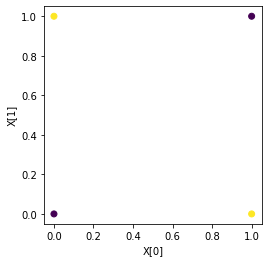

In [ ]:
# Let's define a XOR dataset

# X will be matrix of N 2-dimensional inputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1],], dtype=np.float32)
# Y is a matrix of N numners - answers
Y = np.array([[0], [1], [1], [0],], dtype=np.float32)

plt.scatter(
    X[:, 0], X[:, 1], c=Y[:, 0],
)
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.axis("square")

## Problem 1

The code below contains a mock-up of a two-layer neural network. Fill in the code and manually set weights to solve the XOR problem.

Please note: the shapes are set to be compatible with PyTorch's conventions:
* a batch containing $N$ $D$-dimensional examples has shape $N\times D$ (each example is a row!)
* a weight matrix in a linear layer with $I$ inputs and $O$ outputs has shape $O \times I$
* a bias vector is a 1D vector. Please note that [broadcasting rules](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) allow us to think about it as a $1 \times D$ matrix.

In [ ]:
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

def d_sigmoid(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

class SmallNet:
    def __init__(self, in_features, num_hidden, dtype=np.float32):
        self.W1 = np.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = np.zeros((num_hidden,), dtype=dtype)
        self.W2 = np.zeros((1, num_hidden), dtype=dtype)
        self.b2 = np.zeros((1,), dtype=dtype)
        self.init_params()

    def init_params(self):
        # TODO for Problem 2:
        # set all parameters to small random values, e.g. from N(0, 0.5)
        self.W1 = np.random.normal(0, 0.5, self.W1.shape)
        self.b1 = np.random.normal(0, 0.5, self.b1.shape)
        self.W2 = np.random.normal(0, 0.5, self.W2.shape)
        self.b2 = np.random.normal(0, 0.5, self.b2.shape)

    def forward(self, X, Y=None, do_backward=False):
        # TODO Problem 1: Fill in details of forward propagation

        # Input to neurons in 1st layer
        A1 = X @ self.W1.T + self.b1
        # Outputs after the sigmoid non-linearity
        O1 = sigmoid(A1)

        # Inputs to neuron in the second layer
        A2 = O1 @ self.W2.T + self.b2
        # Outputs after the sigmoid non-linearity
        O2 = sigmoid(A2)

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            # loss = TODO cross-entropy loss
            loss = -Y * np.log(O2) - (1 - Y) * np.log(1 - O2)
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:
            # TODO in Problem 2:
            # fill in the gradient computation
            # Please note, that there is a correspondance between
            # the forward and backward pass: with backward computations happening
            # in reverse order.
            # We save the gradients with respect to the parameters as fields of self.
            # It is not very elegant, but simplifies training code later on.

            # A2_grad is the gradient of loss with respect to A2
            # Hint: there is a concise formula for the gradient
            # of logistic sigmoid and cross-entropy loss

            N = X.shape[0]
            A2_grad = O2 - Y
            self.W2_grad = (A2_grad.T @ O1) / N 
            self.b2_grad = A2_grad.sum(0) / N
            O1_grad = A2_grad @ self.W2
            A1_grad = O1_grad * O1 * (1 - O1)
            self.W1_grad = (A1_grad.T @ X) / N
            self.b1_grad = A1_grad.sum(0) / N
        return O2, loss

##### Loss gradient with respect to A2
$$
loss = -Y \cdot log(O_2) - (1 - Y) \cdot log(1 - O_2)
$$

$$
\frac{∂O_2}{∂A_2} = \frac{∂}{∂A_2}σ(A_2) = O_2(1 - O_2)
$$

$$
\frac{∂loss}{∂A_2} = -Y \cdot \frac{1}{O_2} \cdot O_2(1-O_2) - (1 - Y) \cdot \frac{1}{1 - O_2} \cdot (-O_2(1-O_2))  
$$

$$
= -Y(1 - O_2) + (1-Y)O_2 = O_2 - Y
$$

In [ ]:
# TODO Problem 1:
# Set by hand the weight values to solve the XOR problem

net = SmallNet(2, 2, dtype=np.float64)
net.W1 = np.array([[8, 8], [8, 8]])
net.b1 = np.array([-4, -12])
net.W2 = np.array([[8, -8]])
net.b2 = -4

# Hint: since we use the logistic sigmoid activation, the weights may need to
# be fairly large


predictions, loss = net.forward(X, Y, do_backward=True)
for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet([0. 0.]) = 0.020711047954062596
XORnet([0. 1.]) = 0.9761590452710405
XORnet([1. 0.]) = 0.9761590452710405
XORnet([1. 1.]) = 0.020711047954062596


## Problem 2

In [ ]:
def check_grad(net, param_name, X, Y, eps=1e-5):
    """A gradient checking routine"""

    param = getattr(net, param_name)
    param_flat_accessor = param.reshape(-1)

    grad = np.empty_like(param)
    grad_flat_accessor = grad.reshape(-1)

    net.forward(X, Y, do_backward=True)
    orig_grad = getattr(net, param_name + "_grad")
    assert param.shape == orig_grad.shape

    for i in range(param_flat_accessor.shape[0]):
        orig_val = param_flat_accessor[i]
        param_flat_accessor[i] = orig_val + eps
        _, loss_positive = net.forward(X, Y)
        param_flat_accessor[i] = orig_val - eps
        _, loss_negative = net.forward(X, Y)
        param_flat_accessor[i] = orig_val
        grad_flat_accessor[i] = (loss_positive - loss_negative) / (2 * eps)
    assert np.allclose(grad, orig_grad)
    return grad, orig_grad

In [ ]:
# Hint: use float64 for checking the correctness of the gradient
net = SmallNet(2, 2, dtype=np.float64)

net.forward(X, Y, do_backward=True)

for param_name in ["W1", "b1", "W2", "b2"]:
    check_grad(net, param_name, X, Y)

## Problem 3

In [ ]:
net = SmallNet(2, 10, dtype=np.float64)

alpha = 0.5  # set a learning rate

for i in range(100000):
    _, loss = net.forward(X, Y, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    for param_name in ["W1", "b1", "W2", "b2"]:
        param = getattr(net, param_name)
        # Hint: use the construct `param[:]` to change the contents of the array!
        # Doing instead `param = new_val` simply changes to what the variable
        # param points to, without affecting the network!
        # alternatively, you could do setattr(net, param_name, new_value)
        param[:] = param - alpha * getattr(net, param_name + "_grad")

after 0 steps 	loss=0.6975905326826646
after 5000 steps 	loss=0.002402784886552805
after 10000 steps 	loss=0.0010065126570891782
after 15000 steps 	loss=0.0006226361026200651
after 20000 steps 	loss=0.000446320804871429
after 25000 steps 	loss=0.00034590021374951294
after 30000 steps 	loss=0.0002813673637151227
after 35000 steps 	loss=0.00023654529641168012
after 40000 steps 	loss=0.00020367475114253997
after 45000 steps 	loss=0.0001785804061703965
after 50000 steps 	loss=0.00015882056776548388
after 55000 steps 	loss=0.00014287424563824407
after 60000 steps 	loss=0.0001297457170086867
after 65000 steps 	loss=0.00011875642936723297
after 70000 steps 	loss=0.00010942839478578358
after 75000 steps 	loss=0.00010141540808842017
after 80000 steps 	loss=9.446069917553314e-05
after 85000 steps 	loss=8.83698964704921e-05
after 90000 steps 	loss=8.299321897970684e-05
after 95000 steps 	loss=7.82134249189077e-05


In [ ]:
predictions, loss = net.forward(X, Y, do_backward=True)
for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet([0. 0.]) = 5.9508013347034124e-05
XORnet([0. 1.]) = 0.9999284998979091
XORnet([1. 0.]) = 0.9999271979125228
XORnet([1. 1.]) = 9.192843449826622e-05


In [ ]:
# TODO:
# Generate data for a 3D XOR task
# Then estimate the success rate of training the network with diferent
# hidden sizes.
from itertools import product
from collections import defaultdict

X3 = np.array(list(product((0,1), (0,1), (0,1))), dtype=np.float32)
Y3 = np.array([[all(x) or sum(x) == 1] for x in X3], dtype=np.float32)

L = defaultdict(list); E = {}
for hidden_dim in [2, 3, 5, 10, 20]:
    # TODO: run a few trainings and record the fraction of successful ones
    net = SmallNet(3, hidden_dim, dtype=np.float64)
    alpha = 0.5  # set a learning rate

    for i in range(10**5):
        O,loss = net.forward(X3, Y3, do_backward=True)
        L[hidden_dim].append(loss)
        for param_name in ["W1", "b1", "W2", "b2"]:
            param = getattr(net, param_name)
            param[:] = param - alpha * getattr(net, param_name + "_grad")
    E[hidden_dim] = abs(Y3 - O).sum() / len(X3)

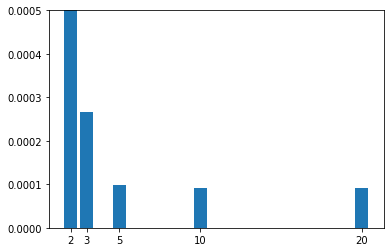

In [ ]:
# All sizes succeed in learning 3D XOR, but the uncertainty differs slightly
fig = plt.figure()
plt.ylim(0, 0.0005)
plt.bar(*(zip(*E.items())))
plt.xticks([2,3,5,10,20])
plt.show()

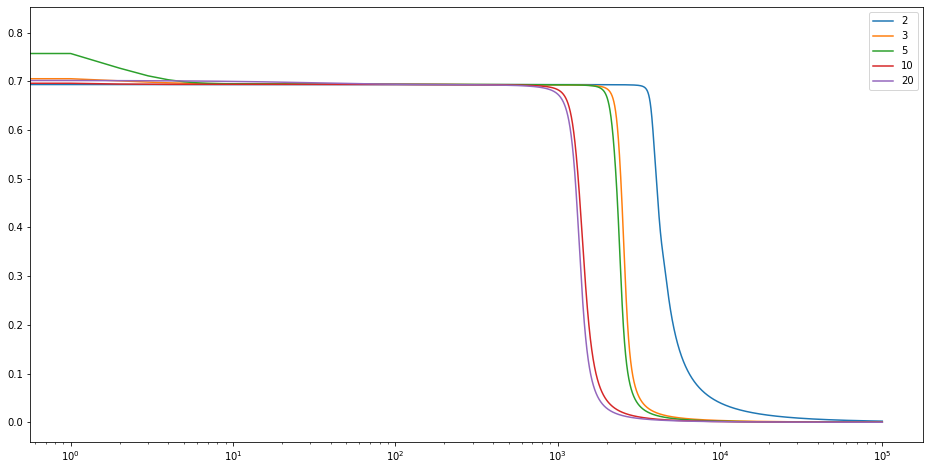

In [ ]:
plt.subplots(figsize=(16, 8))
plt.xscale("log")
for hidden_dim, training in L.items():
    plt.plot(np.linspace(0, len(training), len(training)), training, label=hidden_dim)
plt.legend()
plt.show()

## Deep Neural Network

In [ ]:
import numpy as np


class ActivationFunction:
    def regular(self, x): raise NotImplementedError
    def derivative(self, x): raise NotImplementedError
    def __call__(self, x): return self.regular(x)
    def __getitem__(self, x): return self.derivative(x)


class Sigmoid(ActivationFunction):

    def regular(self, x):
        return 1.0/(1 + np.exp(-x))
    
    def derivative(self, x):
        sig = sigmoid(x)
        return sig * (1 - sig)


class ReLU(ActivationFunction):

    def regular(self, x):
        return np.where(x > 0, x, 1e-2)
    
    def derivative(self, x):
        return np.where(x > 0, 1, 1e-2)


class Layer:

    def __init__(self, n_inputs, n_outputs, activation):
        self.W = np.random.normal(0, 0.5, ((n_outputs, n_inputs)))
        self.b = np.zeros((1, n_outputs))
        self.activation = activation
        self.dW = None
        self.db = None
        self.O_prev = None
        self.A = None


    def __call__(self, X, cache=False):
        A = X @ self.W.T + self.b
        if cache:
            self.O_prev = X.copy()
            self.A = A.copy()
        return A


class DeepNet:

    def __init__(self, architecture, activation = Sigmoid()):
        self.architecture = architecture
        self.activation = activation
        self.layers = [
            Layer(architecture[i - 1], architecture[i], activation=activation)
            for i in range(1, len(architecture))
        ]


    def forward(self, X, Y=None, do_backward=False):
        N = len(X)
        
        O = X
        for layer in self.layers:
            O = layer.activation(layer(O, cache=do_backward))

        if do_backward:
            # loss gradient
            dO = -(Y/O) + (1-Y) / (1-O)

            for layer in reversed(self.layers):
                dA = layer.activation[layer.A] * dO
                layer.dW = (dA.T @ layer.O_prev) / N
                layer.db = dA.sum(0) / N
                dO = dA @ layer.W

        if Y is not None:
            loss = np.sum(-Y * np.log(O) - (1 - Y) * np.log(1 - O)) / N
            return O, loss
        return O

    
    def gradient_decent(self, X, Y, learning_rate = 0.5):
        _, loss = net.forward(X, Y, do_backward=True)
        for layer in self.layers:
            layer.W -= learning_rate * layer.dW
            layer.b -= learning_rate * layer.db
        return loss


## Problem 4


In [ ]:
from itertools import product
from collections import defaultdict

net = DeepNet([3, 5, 1], activation=ReLU())
net.layers[-1].activation = Sigmoid()
X3 = np.array(list(product((0,1), (0,1), (0,1))), dtype=np.float32)
Y3 = np.array([[all(x) or sum(x) == 1] for x in X3], dtype=np.float32)

for i in range(100000):
    loss = net.gradient_decent(X3, Y3, learning_rate = 0.5)
    if (i % 5000) == 0: print(f"after {i} steps \tloss={loss}")

print("3D XOR solution\n", net.forward(X3).ravel(), "~", Y.ravel())

after 0 steps 	loss=0.6901991328766013
after 5000 steps 	loss=0.47498331757213186
after 10000 steps 	loss=0.4102686284643923
after 15000 steps 	loss=0.0019244270029445242
after 20000 steps 	loss=0.0006426595841671654
after 25000 steps 	loss=0.00037351557355591353
after 30000 steps 	loss=0.0002608793434867731
after 35000 steps 	loss=0.00019947821107891775
after 40000 steps 	loss=0.0001591260981659665
after 45000 steps 	loss=0.00013383371977198583
after 50000 steps 	loss=0.00011564292010539402
after 55000 steps 	loss=0.00010001880120795488
after 60000 steps 	loss=8.883712172777036e-05
after 65000 steps 	loss=8.081064286965776e-05
after 70000 steps 	loss=7.288668480079714e-05
after 75000 steps 	loss=6.634246440217519e-05
after 80000 steps 	loss=6.112986950330312e-05
after 85000 steps 	loss=5.7351618168640056e-05
after 90000 steps 	loss=5.3445950320240754e-05
after 95000 steps 	loss=4.912432931684668e-05
3D XOR solution
 [6.41332827e-06 9.99982218e-01 9.99986724e-01 5.79796494e-06
 9.99965

## Problem 5 & 6

after 0 steps 	loss=0.6976019109484958
after 5000 steps 	loss=0.28712405716652417
after 10000 steps 	loss=0.2763595903468472
after 15000 steps 	loss=0.0007788560285278035
after 20000 steps 	loss=0.0002593099494624003
after 25000 steps 	loss=0.00014932004842883772
after 30000 steps 	loss=0.00010336865404070077
after 35000 steps 	loss=7.850358576515833e-05
after 40000 steps 	loss=6.303458857027186e-05
after 45000 steps 	loss=5.25286557084599e-05
after 50000 steps 	loss=4.494939313901513e-05
after 55000 steps 	loss=3.923489329229809e-05
after 60000 steps 	loss=3.4778901150582816e-05
after 65000 steps 	loss=3.121088141005566e-05
after 70000 steps 	loss=2.8291982789580834e-05
after 75000 steps 	loss=2.5861509448212384e-05
after 80000 steps 	loss=2.3807480078402834e-05
after 85000 steps 	loss=2.2049531918357544e-05
after 90000 steps 	loss=2.052853524942275e-05
after 95000 steps 	loss=1.920003934273705e-05


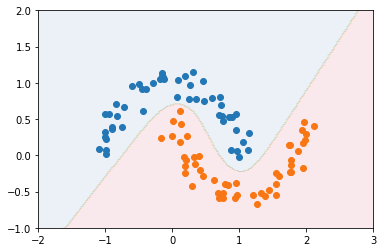

In [ ]:
from sklearn.datasets import make_moons
X, Y = make_moons(noise=0.1)

net = DeepNet([2, 3, 4, 5, 1])
for i in range(10**5):
    loss = net.gradient_decent(X, Y.reshape(-1,1), learning_rate = 0.5)
    if (i % 5000) == 0: print(f"after {i} steps \tloss={loss}")



# Create a grid
N = 200
X1, X2 = np.meshgrid(np.linspace(-2, 3, N), np.linspace(-1, 2, N))
X_flat = np.column_stack((X1.flatten(), X2.flatten()))

# Evaluate model on grid
Y_pred = net.forward(X_flat).T.reshape(X1.shape) < 0.5

plt.scatter(X[Y==0, 0], X[Y==0, 1])
plt.scatter(X[Y==1, 0], X[Y==1, 1])
plt.contourf(X1, X2, Y_pred, cmap='Spectral', alpha=0.1)


## Problem 7

In [ ]:
import numpy as np


class ActivationFunction:
    def regular(self, x): raise NotImplementedError
    def derivative(self, x): raise NotImplementedError
    def __call__(self, x): return self.regular(x)
    def __getitem__(self, x): return self.derivative(x)


class Sigmoid(ActivationFunction):

    def regular(self, x):
        return 1.0/(1 + np.exp(-x))
    
    def derivative(self, x):
        sig = sigmoid(x)
        return sig * (1 - sig)


class ReLU(ActivationFunction):

    def regular(self, x):
        return np.where(x > 0, x, 1e-2)
    
    def derivative(self, x):
        return np.where(x > 0, 1, 1e-2)


class Layer:

    def __init__(self, n_inputs, n_outputs, activation):
        self.W = np.random.normal(0, 0.5, ((n_outputs, n_inputs)))
        self.b = np.zeros((1, n_outputs))
        self.activation = activation
        self.dW = None
        self.db = None
        self.O_prev = None
        self.A = None
        #! feedback weights
        self.W_b = np.random.normal(0, 0.5, ((n_outputs, n_inputs)))

    def __call__(self, X, cache=False):
        A = X @ self.W.T + self.b
        if cache:
            self.O_prev = X.copy()
            self.A = A.copy()
        return A


class DeepNet:

    def __init__(self, architecture, activation = Sigmoid()):
        self.architecture = architecture
        self.activation = activation
        self.layers = [
            Layer(architecture[i - 1], architecture[i], activation=activation)
            for i in range(1, len(architecture))
        ]


    def forward(self, X, Y=None, do_backward=False):
        N = len(X)
        
        O = X
        for layer in self.layers:
            O = layer.activation(layer(O, cache=do_backward))

        if do_backward:
            # loss gradient
            dO = -(Y/O) + (1-Y) / (1-O)

            for layer in reversed(self.layers):
                dA = layer.activation[layer.A] * dO
                layer.dW = (dA.T @ layer.O_prev) / N
                layer.db = dA.sum(0) / N
                dO = dA @ layer.W_b #! using feedback weights instead

        if Y is not None:
            loss = np.sum(-Y * np.log(O) - (1 - Y) * np.log(1 - O)) / N
            return O, loss
        return O

    
    def gradient_decent(self, X, Y, learning_rate = 0.5):
        _, loss = net.forward(X, Y, do_backward=True)
        for layer in self.layers:
            layer.W -= learning_rate * layer.dW
            layer.b -= learning_rate * layer.db
        return loss


after 0 steps 	loss=0.8128220437934409
after 5000 steps 	loss=0.29354253090070215
after 10000 steps 	loss=0.2500811406129033
after 15000 steps 	loss=0.06264692567127644
after 20000 steps 	loss=0.018412027821159485
after 25000 steps 	loss=0.01012855665513506
after 30000 steps 	loss=0.0068663770146755645
after 35000 steps 	loss=0.005137759313585979
after 40000 steps 	loss=0.004073017188337986
after 45000 steps 	loss=0.003354454914701825
after 50000 steps 	loss=0.0028387124457264095
after 55000 steps 	loss=0.002451710495806308
after 60000 steps 	loss=0.002151362609678813
after 65000 steps 	loss=0.0019120175929670745
after 70000 steps 	loss=0.0017171692476931246
after 75000 steps 	loss=0.0015557265382774293
after 80000 steps 	loss=0.0014199691249869423
after 85000 steps 	loss=0.0013043625616763071
after 90000 steps 	loss=0.0012048394024787516
after 95000 steps 	loss=0.0011183458381204383


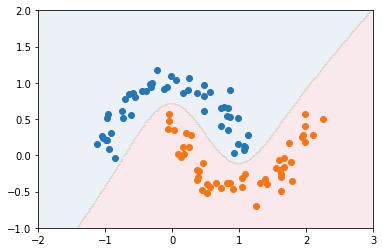

In [ ]:
from sklearn.datasets import make_moons
X, Y = make_moons(noise=0.1)

# [2, 3, 4, 5, 1] solution from the previous problem
# is no longer valid

net = DeepNet([2, 10, 10, 10, 1]) 
for i in range(10**5):
    loss = net.gradient_decent(X, Y.reshape(-1,1), learning_rate = 0.5)
    if (i % 5000) == 0: print(f"after {i} steps \tloss={loss}")



# Create a grid
N = 200
X1, X2 = np.meshgrid(np.linspace(-2, 3, N), np.linspace(-1, 2, N))
X_flat = np.column_stack((X1.flatten(), X2.flatten()))

# Evaluate model on grid
Y_pred = net.forward(X_flat).T.reshape(X1.shape) < 0.5

plt.scatter(X[Y==0, 0], X[Y==0, 1])
plt.scatter(X[Y==1, 0], X[Y==1, 1])
plt.contourf(X1, X2, Y_pred, cmap='Spectral', alpha=0.1)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a3a1faa6-c4a5-41f6-8770-eb93a1e04380' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>